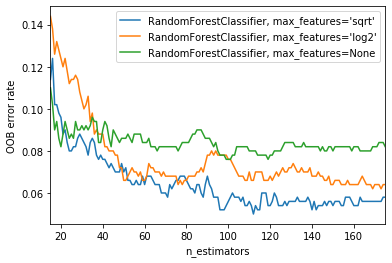

In [3]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier # 回归问题参数相同


RANDOM_STATE = 123 
X, y = make_classification(n_samples=500, n_features=25, n_classes=2,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE) # Generate a random n-class classification problem.

# 随机森林基学习器为决策树(主要调节参数有:max_depth,min_samples_split,min_samples_leaf,max_features,max_leaf_nodes)
# 随机森林可以并行计算
# 随机森林基学习器样本数量与原始输入样本数量相同
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(criterion='gini',  # 此参数一般不用调节
                               n_estimators=100,
                               warm_start=True, # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest(计算加速)
                               oob_score=True, # 是否使用包外样本估计泛化误差
                               n_jobs=-1, # 并行计算
                               max_features="sqrt", # 特征/列采样(默认max_features="sqrt")
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2', n_jobs=-1,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None, n_jobs=-1,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs) # 有序字典

min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i) # Set the parameters of this estimator.
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_ # clf.oob_score_:包外样本的score(对自主采样选中的数据,而不是整个X_trian)
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err) # 先解包再zip合并
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()